<a href="https://colab.research.google.com/github/jay-esh/Stock-priceprediction-LSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 14.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [44]:
import tensorflow as tf
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Date
2010-01-04 00:00:00-05:00     6.695000
2010-01-05 00:00:00-05:00     6.734500
2010-01-06 00:00:00-05:00     6.612500
2010-01-07 00:00:00-05:00     6.500000
2010-01-08 00:00:00-05:00     6.676000
                               ...    
2017-12-22 00:00:00-05:00    58.417999
2017-12-26 00:00:00-05:00    58.838001
2017-12-27 00:00:00-05:00    59.112999
2017-12-28 00:00:00-05:00    59.305000
2017-12-29 00:00:00-05:00    58.473499
Name: Adj Close, Length: 2013, dtype: float64


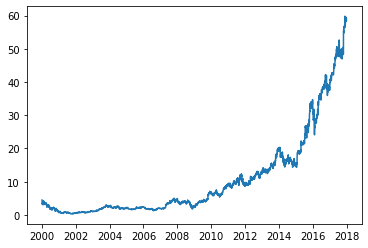

In [66]:
# importing amazon stock price data from yahoo finance
spy = yf.Ticker('AMZN')
entireData = yf.download("AMZN", start="2000-01-01", end="2018-01-01")['Adj Close']
trainingData = yf.download("AMZN", start="2010-01-01", end="2018-01-01")['Adj Close']
testingData = yf.download("AMZN", start="2018-01-02", end="2020-01-01")['Adj Close']
plt.plot(entireData)
print(trainingData)

<class 'numpy.ndarray'>


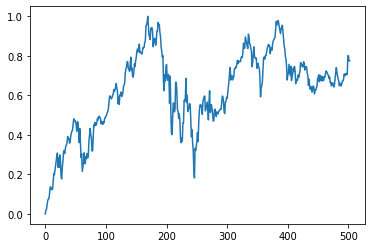

In [58]:
# preparing the data (normalizing the data)
scaler = MinMaxScaler(feature_range=(0,1))
normalized = scaler.fit_transform(trainingData.values.reshape(-1,1))
normalizedTesting = scaler.fit_transform(testingData.values.reshape(-1,1))
plt.plot(normalizedTesting)
print(type(normalized))

xTrain = []
yTrain = []
listTest = []

for i in range(50, len(normalized)):
  xTrain.append(normalized[i-50:i, 0])
  yTrain.append(normalized[i])
  
for j in range(50, len(normalizedTesting)):
  listTest.append(normalizedTesting[j-50:j, 0]) 
  # print(normalizedTesting[j-50:j, 0])

xTrain, yTrain, listTest = np.array(xTrain), np.array(yTrain), np.array(listTest)
xTrain = np.reshape(xTrain, (xTrain.shape[0], xTrain.shape[1], 1))
yTrain = np.reshape(yTrain, (yTrain.shape[0], yTrain.shape[1], 1))
listTest = np.reshape(listTest, (listTest.shape[0], listTest.shape[1], 1))

In [59]:
# LSTM model using tensorflow keras
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(100, return_sequences=True, input_shape=(xTrain.shape[1], 1)))
model.add(tf.keras.layers.LSTM(100, return_sequences=False))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 50, 100)           40800     
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 dense_10 (Dense)            (None, 25)                2525      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xTrain, yTrain, batch_size= 1, epochs=3)

Epoch 1/3
1963/1963 [==============================] - 64s 31ms/step - loss: 0.0012
Epoch 2/3
1963/1963 [==============================] - 60s 31ms/step - loss: 6.7487e-04
Epoch 3/3
1963/1963 [==============================] - 62s 32ms/step - loss: 3.5258e-04


In [ ]:
!pip install transformers

[*********************100%***********************]  1 of 1 completed
            id ticker                                              title  \
180620  402136   AMZN   Cnova  New e Commerce Site With Upside Potential   
168777  390293   AMZN                Macy s to cut jobs  close 14 stores   
168778  390294   AMZN  Fire extinguished at Amazon data center under ...   
168779  390295   AMZN  China allows full foreign ownership of e comme...   
180600  402116   AMZN  Analysts Are Bullish On Amazon Following Golde...   
...        ...    ...                                                ...   
166375  387891   AMZN  Wall St  edges up in low volume  boosted by te...   
177481  398997   AMZN                               2016 Market Lessons    
166372  387888   AMZN  Amazon calls 2016 holiday season its best ever...   
166333  387849   AMZN  Run DMC founder sues Amazon com  Wal Mart over...   
166332  387848   AMZN          Amazon looks to the sky to store products   

       category   

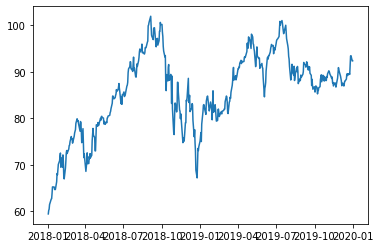

180620    Positive
Name: Sentiment, dtype: object
168777    Neutral
Name: Sentiment, dtype: object
168778    Negative
Name: Sentiment, dtype: object
168779     Neutral
180600    Positive
Name: Sentiment, dtype: object
168751    Neutral
Name: Sentiment, dtype: object
168752    Negative
Name: Sentiment, dtype: object
168753    Neutral
Name: Sentiment, dtype: object
180601    Negative
Name: Sentiment, dtype: object
168725    Neutral
Name: Sentiment, dtype: object
168726    Neutral
Name: Sentiment, dtype: object
168727    Positive
Name: Sentiment, dtype: object
168728    Positive
Name: Sentiment, dtype: object
180580    Positive
Name: Sentiment, dtype: object
168702    Neutral
Name: Sentiment, dtype: object
180569    Positive
168703     Neutral
Name: Sentiment, dtype: object
168706    Negative
Name: Sentiment, dtype: object
168707    Neutral
Name: Sentiment, dtype: object
168680    Neutral
Name: Sentiment, dtype: object
168681    Negative
Name: Sentiment, dtype: object
168682    Positive
N

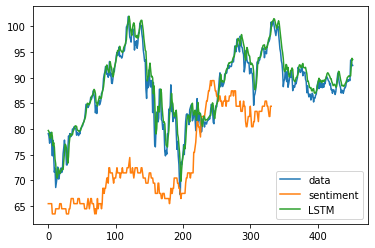

In [68]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import random
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.corpus import movie_reviews
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
from datetime import date, timedelta
import torch

# pre-trained model for Natural Language processing on finance news
finbert = BertForSequenceClassification.from_pretrained(
    'yiyanghkust/finbert-tone', num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

# AMZN stock analysis from 2015 till 2017
# data taken from yahoo finance API
amzn = yf.Ticker("AMZN")
data = yf.download("AMZN", start="2018-01-01", end="2020-01-01")['Adj Close']

# got the news headlines from kaggle in a csv file
# reading a csv file
# storing the data in the form of a table - DataFrame type from pandas
df = pd.read_csv('us_equities_news_dataset.csv')

# changing to an appropriate date type
df['release_date'] = pd.to_datetime(df['release_date'])

# querying news headlines from the csv file between the time frame chosen
mask = (df['release_date'] > '2015-01-01') & (df['release_date'] <= '2017-01-01')
df = df.loc[mask]

# from the news headlines between the given dates we query the headlines for AMZN
df = df.query("ticker=='AMZN'")

# sorting them datewise in an ascending order
df = df.sort_values(by='release_date', ascending=True)
print(df)

# storing the sentiments of the headlines in a list (will be using this later)
sentiments = []
for i in df['title'].values:
    sentiments.append(nlp(i)[0]['label'])

# helper function to iterate over range of dates


def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)


start_date = date(2015, 1, 1)
end_date = date(2017, 1, 2)

plt.plot(data)
plt.show()

# creating a new column to the data table
df["Sentiment"] = sentiments

# initializing the values for graphing
price = data[0]
prices = []
# prices.append(price)
dates = []

for single_date in daterange(start_date, end_date):
    newmask = df['release_date'] == single_date.strftime("%Y-%m-%d")
    newdf = df.loc[newmask]
    # there are some dates missing since there are no news headlines for some days
    if newdf.empty == False:
        print(newdf['Sentiment'])
        for sentiment in newdf['Sentiment']:
            if sentiment == "Positive":
                price += 1
            elif sentiment == "Negative":
                price -= 1
            else:
                continue
        dates.append(single_date)
        prices.append(price)

# df["real-price"] = data
# print(df)
# print(prices)
# print(dates)

plt.plot(data.values[50:], label="data")
plt.plot(prices[50:], label="sentiment")
predict = model.predict(listTest)
# scaler = MinMaxScaler(feature_range=(0,1))
# predict = scaler.inverse_transform(predict)

# plt.plot(testingData.values[50:], label="data2")
predict = scaler.inverse_transform(predict)
plt.plot(predict, label='LSTM')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')